In [5]:
import torch
import numpy as np

In [6]:
torch.set_printoptions(precision=16, threshold=10000)

In [7]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a 192-dimensional vector with values uniformly sampled from range [-1e-6, 1e-6] and move to GPU
tensor_float32 = torch.empty(192, dtype=torch.float32, device=device).uniform_(0, 500)
# tensor_float32 = torch.empty(192, dtype=torch.float32, device=device).uniform_(-1e-6, 1e-6)
tensor_float64 = tensor_float32.to(dtype=torch.float64)  # Convert to float64

# Compute sum for float32 and float64
sum_float32 = tensor_float32.sum()
sum_float64 = tensor_float64.sum()

print(f"Sum (float32): {sum_float32}")
print(f"Sum (float64): {sum_float64}")

Sum (float32): 48387.484375
Sum (float64): 48387.48353099823


In [8]:
example_output = np.load("example_output_test_stress_p2g.npz")
outputs0 = example_output["outputs0"]
outputs0 = (outputs0 - outputs0.min())/(outputs0.max() - outputs0.min() + 1e-6)
print(f"check data range: {outputs0.min()} {outputs0.max()}, shape {outputs0.shape}")

# Create a 192-dimensional vector with values uniformly sampled from range [-1e-6, 1e-6] and move to GPU
tensor_float32 = torch.from_numpy(outputs0[1]).to(torch.float32) # Convert to float32
tensor_float64 = torch.from_numpy(outputs0[1]).to(torch.float64)  # Convert to float64

# Compute sum for float32 and float64
sum_float32 = tensor_float32.sum()
sum_float64 = tensor_float64.sum()

print(f"Sum (float32): {sum_float32}")
print(f"Sum (float64): {sum_float64}")

check data range: 0.0 1.0, shape (4, 4, 4, 3)
Sum (float32): 25.412399291992188
Sum (float64): 25.412399411201477


check data range: 0.0 1.0, shape (192,)
check sum_diff min -6.4820051193237305e-06, max 7.37607479095459e-06


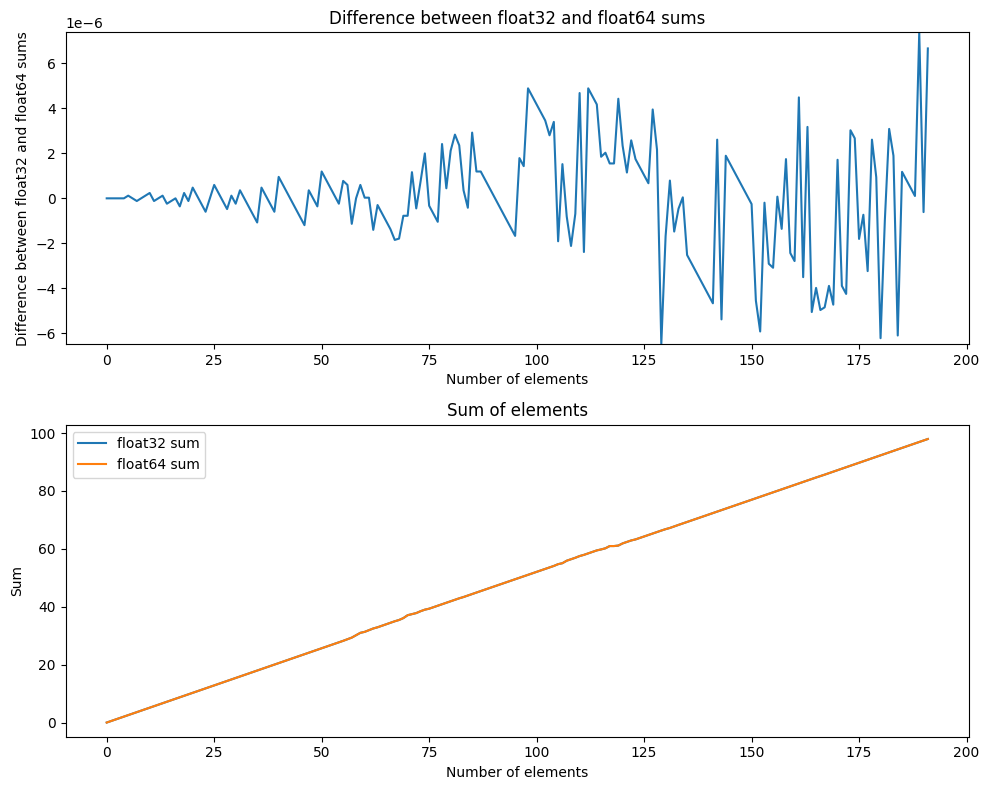

: 

In [ ]:
# check if the error accummulates over the elements of the sum
outputs0_flattened = outputs0.flatten()
print(f"check data range: {outputs0_flattened.min()} {outputs0_flattened.max()}, shape {outputs0_flattened.shape}")
outputs0_flattened = torch.from_numpy(outputs0_flattened).to(device)
outputs0_flattened_f32 = outputs0_flattened.to(torch.float32)  # Convert to float32
outputs0_flattened_f64 = outputs0_flattened.to(torch.float64)  # Convert to float64
sum_diff = []
sum_float32_list = []
sum_float64_list = []
for i in range(len(outputs0_flattened)):
    sum_float32 = outputs0_flattened_f32[:i].sum().to(torch.float32)
    sum_float64 = outputs0_flattened_f64[:i].sum().to(torch.float64)
    sum_diff.append((sum_float32 - sum_float64).detach().cpu().numpy())
    sum_float32_list.append(sum_float32.detach().cpu().numpy())
    sum_float64_list.append(sum_float64.detach().cpu().numpy())


print(f"check sum_diff min {min(sum_diff)}, max {max(sum_diff)}")
# plot the difference against the number of elements
import matplotlib.pyplot as plt
# Combine them into a single plot
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(range(len(sum_diff)), sum_diff)
axes[0].set_ylim(min(sum_diff), max(sum_diff))
axes[0].set_xlabel("Number of elements")
axes[0].set_ylabel("Difference between float32 and float64 sums")
axes[0].set_title("Difference between float32 and float64 sums")

axes[1].plot(range(len(sum_float32_list)), sum_float32_list, label="float32 sum")
axes[1].plot(range(len(sum_float64_list)), sum_float64_list, label="float64 sum")
axes[1].set_xlabel("Number of elements")
axes[1].set_ylabel("Sum")
axes[1].set_title("Sum of elements")
axes[1].legend()

plt.tight_layout()
plt.savefig("sum_diff.png")
plt.show()

In [7]:
# check the difference introduced by loss data type
sum_in_f32 = sum_float32.to(torch.float32)
sum_in_f64 = sum_float64.to(torch.float64)
print(f"Sum in f32: {sum_in_f32}, Sum in f64: {sum_in_f64}")
print(f"Difference: {sum_in_f64 - sum_in_f32}")

Sum in f32: 25.412399291992188, Sum in f64: 25.412399411201477
Difference: 1.1920928955078125e-07


In [60]:
for i in range(4):
    print((tensor_float64[i]-tensor_float32[i]).sum()), tensor_float32.shape

(tensor_float32.sum() - tensor_float64.sum())

tensor(0., dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(0., dtype=torch.float64)


tensor(-1.1920928955078125e-07, dtype=torch.float64)

In [50]:
tensor_float64[0,0,0], tensor_float32

(tensor(0.5127, dtype=torch.float64),
 tensor([[[0.5127, 0.5127, 0.5127],
          [0.5127, 0.5127, 0.5127],
          [0.5352, 0.5512, 0.5630],
          [0.8076, 0.8425, 0.3360]],
 
         [[0.5854, 0.5821, 0.4125],
          [0.5127, 0.5127, 0.5127],
          [0.5372, 0.4433, 0.6551],
          [1.0000, 0.3738, 0.3616]],
 
         [[0.6441, 0.5309, 0.3386],
          [0.5127, 0.5127, 0.5127],
          [0.5117, 0.4986, 0.5202],
          [0.5178, 0.4424, 0.5254]],
 
         [[0.5152, 0.5032, 0.5101],
          [0.5127, 0.5127, 0.5127],
          [0.5127, 0.5127, 0.5127],
          [0.5127, 0.5127, 0.5127]]]))

In [10]:
example_output = np.load("example_output_test_stress_p2g.npz")
outputs0 = example_output["outputs1"]
print(f"check data range: {outputs0.min()} {outputs0.max()}, shape {outputs0.shape}")

# Create a 192-dimensional vector with values uniformly sampled from range [-1e-6, 1e-6] and move to GPU
tensor_float32 = torch.tensor(outputs0) # Convert to float32
tensor_float32_ = torch.from_numpy(outputs0)
tensor_float64 = tensor_float32.to(dtype=torch.float64)  # Convert to float64

# Compute sum for float32 and float64
sum_float32 = tensor_float32.sum()
sum_float32_ = tensor_float32_.sum()
sum_float64 = tensor_float64.sum()

print(f"Sum (float32): {sum_float32}, {sum_float32_}")
print(f"Sum (float64): {sum_float64}")

check data range: -330.204833984375 313.7890625, shape (4, 4, 4, 3)
Sum (float32): 0.0, 0.0
Sum (float64): -8.840113878250122e-06


In [4]:
import numpy as np
a = 1234
a += 1e-7
print(a, type(a))
# cast a to double 
a_double = np.float64(a)
print(a_double, type(a_double))


1234.0000001 <class 'float'>
1234.0000001 <class 'numpy.float64'>
